In [18]:
import numpy as np
import pandas as pd
import re
from datasets import load_dataset
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#from nltk.corpus import stopwords

In [19]:
dataset_en_hi = load_dataset("open_subtitles", "en-hi")
dataset_da_ru = load_dataset("open_subtitles", "da-ru")

In [20]:
data_en_hi = dataset_en_hi["train"]
data_da_ru = dataset_da_ru["train"]

In [21]:
data_en_hi[0:2]

{'id': ['0', '1'],
 'meta': [{'year': 1948,
   'imdbId': 40522,
   'subtitleId': {'en': 4180294, 'hi': 4239106},
   'sentenceIds': {'en': [1], 'hi': [1]}},
  {'year': 1948,
   'imdbId': 40522,
   'subtitleId': {'en': 4180294, 'hi': 4239106},
   'sentenceIds': {'en': [2], 'hi': [2]}}],
 'translation': [{'en': 'THE BICYCLE THIEF', 'hi': 'साइकिल चोर'},
  {'en': 'Ricci?', 'hi': 'रिच्ची?'}]}

In [22]:

X = [[movie['year']] for movie in data_en_hi['meta']]  
y = ['en' if translation['hi'] in ['THE BICYCLE THIEF', 'Ricci?'] else 'hi' for translation in data_en_hi['translation']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)


Accuracy: 1.0


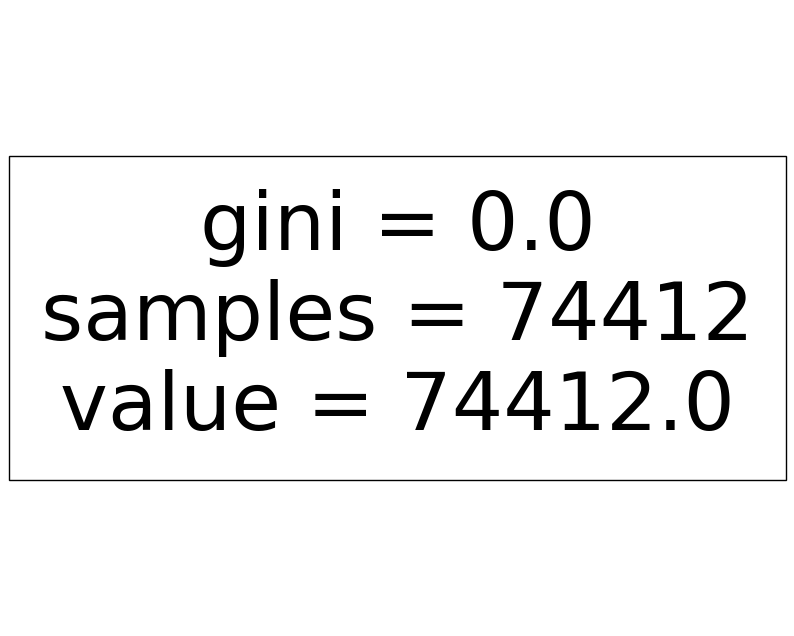

In [23]:

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_tree(dt_clf, feature_names=['Year'], class_names=['English', 'Hindi'], filled=True)
plt.show()


Decision Tree 1: Accuracy = 1.00
Confusion Matrix 1:
 [[18604]]


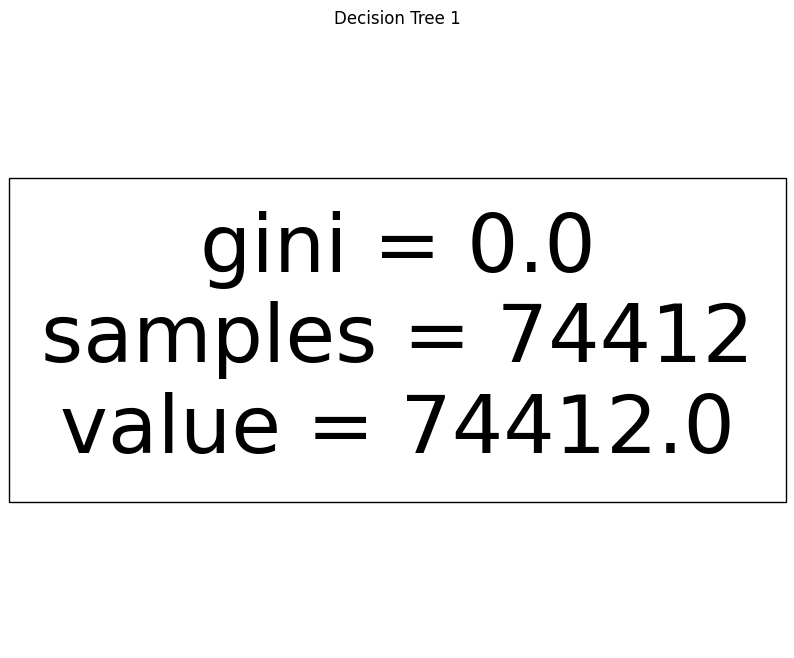

Decision Tree 2: Accuracy = 1.00
Confusion Matrix 2:
 [[18604]]


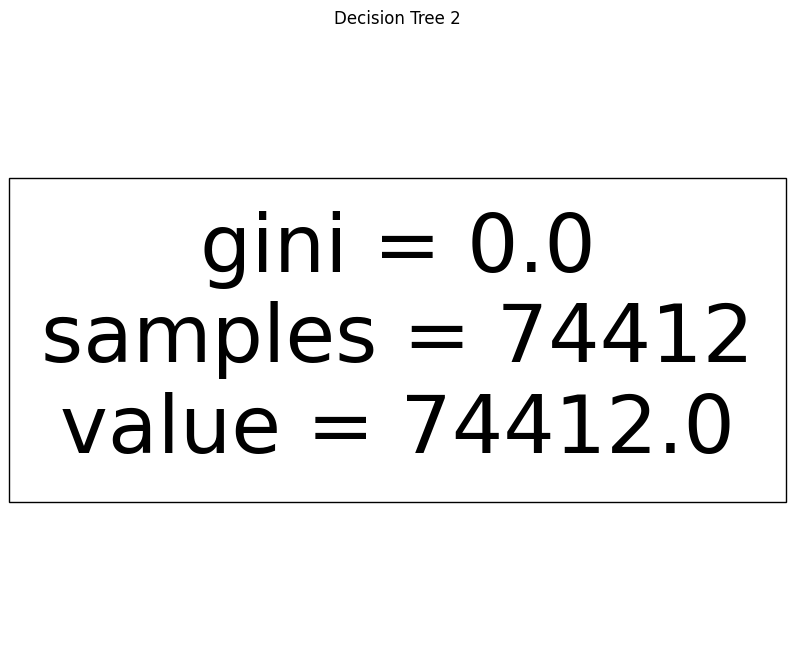

Decision Tree 3: Accuracy = 1.00
Confusion Matrix 3:
 [[18604]]


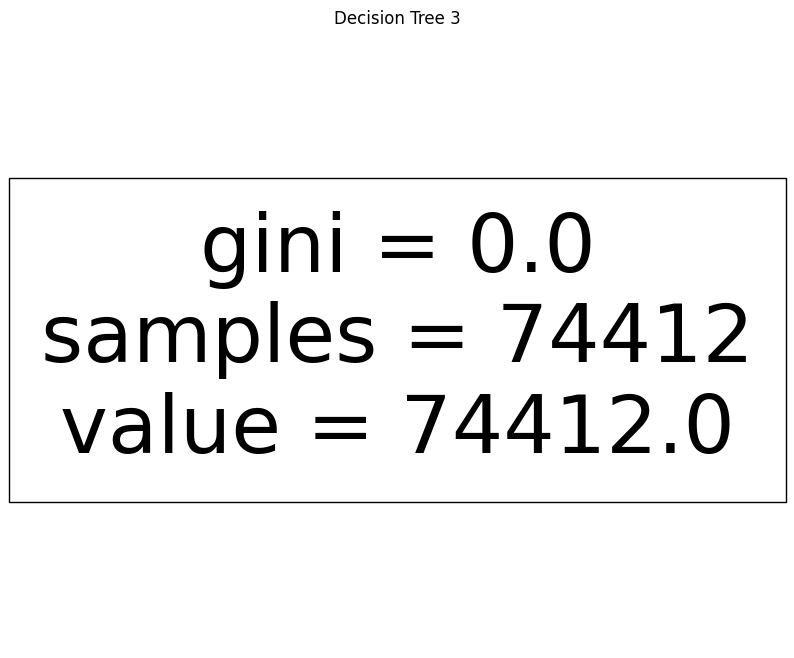

In [24]:

classifiers = [
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=3),
    DecisionTreeClassifier(max_depth=5)
]

for i, dt_clf in enumerate(classifiers, start=1):
    dt_clf.fit(X_train, y_train)

    y_pred_dt = dt_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_dt)
    print(f"Decision Tree {i}: Accuracy = {accuracy:.2f}")

    cm = confusion_matrix(y_test, y_pred_dt)
    print(f"Confusion Matrix {i}:\n", cm)

    plt.figure(figsize=(10, 8))
    plot_tree(dt_clf, feature_names=['Year'], class_names=['English', 'Hindi'], filled=True)
    plt.title(f"Decision Tree {i}")
    plt.show()


In [25]:

X = [translation['en'] for translation in data_en_hi['translation']]  # English subtitles
y = ['en' if translation['hi'] in ['साइकिल चोर', 'रिच्ची?'] else 'hi' for translation in data_en_hi['translation']]  # Target labels

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)


Accuracy: 0.9999462481186842


Accuracy: 0.9999462481186842


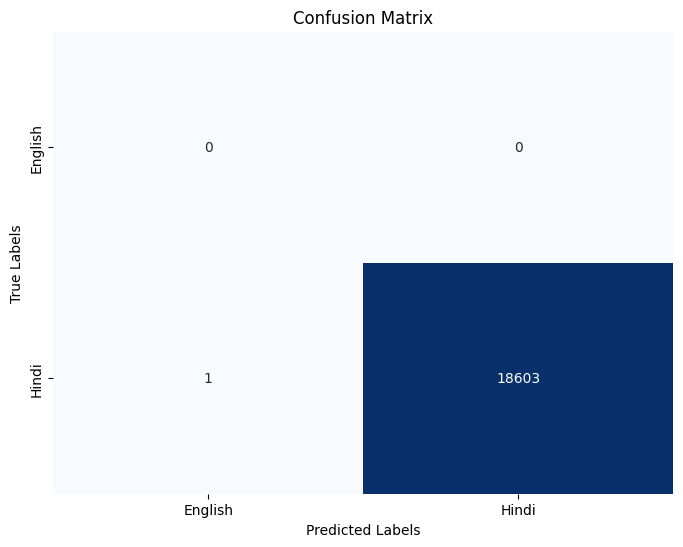

In [26]:

y_pred_nb = nb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

nb_cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5], labels=['English', 'Hindi'])
plt.yticks(ticks=[0.5, 1.5], labels=['English', 'Hindi'])
plt.show()
